# Mission data impossible challenge


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import re
import emoji 
from collections import Counter
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [ ]:
df = pd.read_csv("DMI_train.csv")
df.head()

,Index,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,class
0,1,1!.2376@6^07!🅰️46🏧2203^2(84%e*🇦🇱+1🥇8,301.44!9!75&1+🥉0🥇517🥉0🏧56$,27_.0)40724*🥈615478@9@,2🥇4.7*🥇69@58),23.^🥉08!🇦🇱7%9*,21).#4#80&66🥉,20$🇦🇱.47^4#2🥇19,1🥉9🥈.7#🆎1^🇦🇱9🏧647@,360$9,301+,5_🅰️,1#2^6,1(0🅰️8701*87.🥉0#,45🆎3%,1🅰.2!70🅰0_7🅰️272+37$1*5🆎7)2,83🇩🇿5)2,57^26🇩🇿0,LIE
1,2,1*.^23767)112🇦🇱7*60_5^70🥉7e^+18🅰,20🇦🇱5.550🏧5#1&8784🅰️6%🥈5#1🏧22,31).0$483_4(264101(91$1!,20.🥈4(1(🥈4^29,21🇦🇫._🆎1🏧98🅰9*1#,20.&487(3+3,19🅰.7^586^71,19.8)86🅰️14&5,NaN,3🥈01🥈,4,56(,12@775🇦🇱440^.!0,29,1+.5^3(44*94_667🇦🇱3)83^49$,73#5🥇8,56(7🅰️63,TRUTH
2,3,1.&🅰️23@7^6!6🥇0&1%52#71%556+e+1)8🇩🇿,83@.241+🥇1833🏧83#3@806🇩🇿3,1*2).6^🥇86🅰️924757^🇦🇫07$🏧378🆎6,22🆎.)31!9)79🅰,22.9🥇90🥇32$,2@🥇2.3🅰️9039!,2+🅰1.904*91🆎5,2🥇1.&5🆎25@323),3🅰️225)🏧,301,5🇦🇫,158!🅰️,2^🥈8!8🆎2231*.0,59@,2🥉.🥇54*3+396🥇9_2🆎1$🥈6435!🥈5🥈,8466_,5)🥈7!402,TRUTH
3,4,1*🇦🇱.2$376728^7713&🇩🇿30^3!7e🇦🇫+🇦🇫18,33@🇦🇫6.6_5*95^8^🅰️8%1^59078_3*4,4^1^.1%2🥈7!4#56339@157085(🇦🇱,21🇩🇿.+🥈39+76!5$,2_1.735!93^🅰,1🥇9.98🥈7)🥈99$,19(🇦🇱.3$9*7&7(3🅰️9🇩🇿,18.93(🥇3)2_5,7080,3^01🇦🇫,5,2🅰️8+8*,1_0^0617&48.0*,8&🇦🇱5$3🇦🇱,1*.3🥉62🇦🇫7170)4!37*83🅰41,3696,54938🆎,TRUTH
4,5,1#.(2🥈37)6+6$223616🇦🇱580&4(3$e+1!🏧8@🇦🇱,15.80^1🅰️0🥉1🇦🇱4🅰️136604@🥈4🅰️8*3,1+0.🇦🇱11@6&55)🥈53180🆎92!9)42#🏧,22.🇦🇫901🅰️89+,21🆎.(5^1🅰5$🅰️08,19(🅰.44^🅰️96+6,1🇦🇫7!.9🇩🇿086$11,1*🅰7*.^3🆎7🥇71(12,43!94,30@1%,1,74@,3🆎0+🇩🇿00$801.(0),1%42,0_🏧.265%04!🥇4%9411🥉40)🇦🇱26*,2🥉5(0🏧0,548%6#🇩🇿4),TRUTH


In [ ]:


# Load the CSV file (replace 'data.csv' with your actual filename)


# Select all columns except 'Index' and 'class' (assuming they are not obfuscated)
text_data = df.drop(columns=["Index", "class"], errors="ignore").astype(str)

# Combine all text columns into a single large text string
full_text = " ".join(text_data.values.flatten())

# Analyze frequency of individual characters
char_freq = Counter(full_text)

# Extract special characters, numbers, and emojis separately
special_chars = re.findall(r"[^\w\s]", full_text)  # Symbols like @, !, %, *
numbers = re.findall(r"\d+", full_text)  # Extract numbers
emojis = re.findall(r"[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F]+", full_text)  # Emojis

# Count occurrences
special_chars_freq = Counter(special_chars)
numbers_freq = Counter(numbers)
emoji_freq = Counter(emojis)

# Display results
print("Character Frequency:", char_freq.most_common(10))
print("Special Characters Frequency:", special_chars_freq.most_common(10))
print("Number Frequency:", numbers_freq.most_common(10))
print("Emoji Frequency:", emoji_freq.most_common(10))

# Identify common patterns (repeated sequences)
patterns = re.findall(r"(\D{2,})", full_text)  # Extract non-numeric repeating sequences
pattern_freq = Counter(patterns)


print("Common Patterns:", pattern_freq.most_common(10))


Character Frequency: [('1', 12855200), (' ', 11899999), ('2', 10843686), ('3', 9683322), ('0', 9295223), ('6', 8908861), ('5', 8880836), ('7', 8740862), ('8', 8575500), ('4', 8038381)]
Special Characters Frequency: [('.', 6992489), ('🇦', 4080771), ('🅰', 4080121), ('+', 3249881), ('@', 2553050), ('*', 2552844), ('$', 2552417), ('%', 2552189), (')', 2551325), ('^', 2550715)]
Number Frequency: [('1', 4838411), ('2', 3538615), ('0', 3291709), ('3', 2831135), ('5', 2599583), ('8', 2467270), ('6', 2405508), ('7', 2317715), ('4', 2284337), ('9', 2117165)]
Emoji Frequency: [('🏧', 2042595)]
Common Patterns: [('🅰️', 1036727), ('🇩🇿', 1036318), ('🇦🇫', 1035269), ('🇦🇱', 1035122), ('@ ', 235664), ('_ ', 235449), ('* ', 235267), ('% ', 235157), ('& ', 235093), ('( ', 235065)]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Index   700000 non-null  int64 
 1   f1      699258 non-null  object
 2   f2      699261 non-null  object
 3   f3      699224 non-null  object
 4   f4      699245 non-null  object
 5   f5      699240 non-null  object
 6   f6      699246 non-null  object
 7   f7      699235 non-null  object
 8   f8      699277 non-null  object
 9   f9      699270 non-null  object
 10  f10     699290 non-null  object
 11  f11     699245 non-null  object
 12  f12     699290 non-null  object
 13  f13     699247 non-null  object
 14  f14     699270 non-null  object
 15  f15     699256 non-null  object
 16  f16     699262 non-null  object
 17  f17     699235 non-null  object
 18  class   700000 non-null  object
dtypes: int64(1), object(18)
memory usage: 101.5+ MB


Extracting column names

In [ ]:
columns= df.columns.to_list()
columns

['Index',
 'f1',
 'f2',
 'f3',
 'f4',
 'f5',
 'f6',
 'f7',
 'f8',
 'f9',
 'f10',
 'f11',
 'f12',
 'f13',
 'f14',
 'f15',
 'f16',
 'f17',
 'class']

Cleaning the dataset 

In [ ]:
def clean_text(text):
    """Removes special characters, emojis, and keeps numbers/letters."""
    cleaned_text = re.sub(r'[^A-Za-z0-9.\s]', '', text)  # Retain only alphanumeric spaces, and dots
    return cleaned_text


# Apply cleaning function to all columns except index/class
for col in df.columns[1:-1]:  
    df[col] = df[col].astype(str).apply(clean_text)

# Save the cleaned dataset
df.to_csv("cleaned_train_dataset.csv", index=False)

print("Data cleaning completed.")
    

Data cleaning completed.


In [ ]:
df_cleaned = pd.read_csv("cleaned_train_dataset.csv")
df_cleaned.head()

,Index,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,class
0,1,1.237661e+18,301.449751,27.040725,24.76958,23.08790,21.48066,20.474219,19.719647,3609.0,301.0,5.0,126.0,10870187.0,453.0,1.270073,8352.0,57260.0,LIE
1,2,1.237671e+18,205.550519,31.048343,20.41429,21.19891,20.48733,19.758671,19.886145,NaN,301.0,4.0,56.0,12775440.0,29.0,1.534495,7358.0,56763.0,TRUTH
2,3,1.237660e+18,83.241183,12.686925,22.31979,22.99032,22.39039,21.904915,21.525323,3225.0,301.0,5.0,158.0,2882231.0,59.0,2.543397,8466.0,57402.0,TRUTH
3,4,1.237673e+18,336.659588,41.127456,21.39765,21.73593,19.98799,19.397739,18.933250,7080.0,301.0,5.0,288.0,10061748.0,853.0,1.362717,3696.0,54938.0,TRUTH
4,5,1.237662e+18,15.801014,10.116555,22.90189,21.51508,19.44966,17.908611,17.377112,4394.0,301.0,1.0,74.0,3000801.0,142.0,0.265045,2500.0,54864.0,TRUTH


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Index   700000 non-null  int64  
 1   f1      699258 non-null  float64
 2   f2      699261 non-null  float64
 3   f3      699224 non-null  float64
 4   f4      699245 non-null  float64
 5   f5      699240 non-null  float64
 6   f6      699246 non-null  float64
 7   f7      699235 non-null  float64
 8   f8      699277 non-null  float64
 9   f9      699270 non-null  float64
 10  f10     699290 non-null  float64
 11  f11     699245 non-null  float64
 12  f12     699290 non-null  float64
 13  f13     699247 non-null  float64
 14  f14     699270 non-null  float64
 15  f15     699256 non-null  float64
 16  f16     699262 non-null  float64
 17  f17     699235 non-null  float64
 18  class   700000 non-null  object 
dtypes: float64(17), int64(1), object(1)
memory usage: 101.5+ MB


In [ ]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,700000.0,3.500005e+05,2.020727e+05,1.000000e+00,1.750008e+05,3.500005e+05,5.250002e+05,7.000000e+05
f1,699258.0,1.237665e+18,8.644268e+12,1.237646e+18,1.237659e+18,1.237665e+18,1.237672e+18,1.237681e+18
f2,699261.0,1.774689e+02,1.051381e+02,1.110030e-02,8.554010e+01,1.765759e+02,2.688318e+02,3.599996e+02
f3,699224.0,2.691738e+01,9.299148e+02,2.557504e-04,1.051565e+01,2.319626e+01,3.791982e+01,7.020894e+05
f4,699245.0,2.207940e+01,2.252325e+00,9.621670e+00,2.056624e+01,2.208533e+01,2.359943e+01,3.278139e+01
f5,699240.0,2.063136e+01,2.035485e+00,1.022490e+01,1.925834e+01,2.064046e+01,2.200503e+01,3.078206e+01
f6,699246.0,1.962551e+01,1.839798e+00,9.822070e+00,1.844153e+01,1.972800e+01,2.091863e+01,2.615543e+01
f7,699235.0,1.908412e+01,1.739939e+00,1.073819e+01,1.792802e+01,1.912407e+01,2.028029e+01,2.624473e+01
f8,699277.0,1.876860e+01,1.764468e+00,9.470986e+00,1.762708e+01,1.884895e+01,1.999682e+01,2.533319e+01
f9,699270.0,4.741787e+03,2.136604e+03,2.110000e+02,3.029000e+03,4.918000e+03,6.581000e+03,8.162000e+03


To access specific rows in a specific column
1. loc operator - df.loc[[0,2], 'Name'] - it access the 0,2 rows from 'name' column 
2. iloc operator - df.iloc[[0,2],df.columns.get_loc('Name')] - it access the 0,2 rows from 'name' column (row positions)

In [ ]:
df_cleaned.iloc[[0,10],df.columns.get_loc('f11')]


0     5.0
10    1.0
Name: f11, dtype: float64

In [ ]:
df_cleaned.loc[[0,10],'f11']

0     5.0
10    1.0
Name: f11, dtype: float64

Row slicing 
1. We can use the slicing [start:stop:step]
2. When using iloc to access the column use df.columns.get_loc(column name)

In [ ]:
specific_rows = df_cleaned.loc[1:3,'f11']
specific_rows

1    4.0
2    5.0
3    5.0
Name: f11, dtype: float64

In [ ]:
specific_rows = df_cleaned.iloc[1:3,df.columns.get_loc('f11')]
specific_rows

1    4.0
2    5.0
Name: f11, dtype: float64

In [ ]:
df_cleaned.head()

,Index,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,class
0,1,1.237661e+18,301.449751,27.040725,24.76958,23.08790,21.48066,20.474219,19.719647,3609.0,301.0,5.0,126.0,10870187.0,453.0,1.270073,8352.0,57260.0,LIE
1,2,1.237671e+18,205.550519,31.048343,20.41429,21.19891,20.48733,19.758671,19.886145,NaN,301.0,4.0,56.0,12775440.0,29.0,1.534495,7358.0,56763.0,TRUTH
2,3,1.237660e+18,83.241183,12.686925,22.31979,22.99032,22.39039,21.904915,21.525323,3225.0,301.0,5.0,158.0,2882231.0,59.0,2.543397,8466.0,57402.0,TRUTH
3,4,1.237673e+18,336.659588,41.127456,21.39765,21.73593,19.98799,19.397739,18.933250,7080.0,301.0,5.0,288.0,10061748.0,853.0,1.362717,3696.0,54938.0,TRUTH
4,5,1.237662e+18,15.801014,10.116555,22.90189,21.51508,19.44966,17.908611,17.377112,4394.0,301.0,1.0,74.0,3000801.0,142.0,0.265045,2500.0,54864.0,TRUTH


In [ ]:
df_cleaned.drop(columns='f10',inplace=True)

In [ ]:
numeric_df_cleaned = df_cleaned.select_dtypes(include=['number'])
numeric_df_cleaned.head()

,Index,f1,f2,f3,f4,f5,f6,f7,f8,f9,f11,f12,f13,f14,f15,f16,f17
0,1,1.237661e+18,301.449751,27.040725,24.76958,23.08790,21.48066,20.474219,19.719647,3609.0,5.0,126.0,10870187.0,453.0,1.270073,8352.0,57260.0
1,2,1.237671e+18,205.550519,31.048343,20.41429,21.19891,20.48733,19.758671,19.886145,NaN,4.0,56.0,12775440.0,29.0,1.534495,7358.0,56763.0
2,3,1.237660e+18,83.241183,12.686925,22.31979,22.99032,22.39039,21.904915,21.525323,3225.0,5.0,158.0,2882231.0,59.0,2.543397,8466.0,57402.0
3,4,1.237673e+18,336.659588,41.127456,21.39765,21.73593,19.98799,19.397739,18.933250,7080.0,5.0,288.0,10061748.0,853.0,1.362717,3696.0,54938.0
4,5,1.237662e+18,15.801014,10.116555,22.90189,21.51508,19.44966,17.908611,17.377112,4394.0,1.0,74.0,3000801.0,142.0,0.265045,2500.0,54864.0


In [ ]:
numeric_cols = numeric_df_cleaned.select_dtypes(include=['number']).columns
numeric_df_cleaned[numeric_cols] = numeric_df_cleaned[numeric_cols].fillna(numeric_df_cleaned[numeric_cols].mean())

In [ ]:
numeric_df_cleaned.head()

,Index,f1,f2,f3,f4,f5,f6,f7,f8,f9,f11,f12,f13,f14,f15,f16,f17
0,1,1.237661e+18,301.449751,27.040725,24.76958,23.08790,21.48066,20.474219,19.719647,3609.000000,5.0,126.0,10870187.0,453.0,1.270073,8352.0,57260.0
1,2,1.237671e+18,205.550519,31.048343,20.41429,21.19891,20.48733,19.758671,19.886145,4741.787161,4.0,56.0,12775440.0,29.0,1.534495,7358.0,56763.0
2,3,1.237660e+18,83.241183,12.686925,22.31979,22.99032,22.39039,21.904915,21.525323,3225.000000,5.0,158.0,2882231.0,59.0,2.543397,8466.0,57402.0
3,4,1.237673e+18,336.659588,41.127456,21.39765,21.73593,19.98799,19.397739,18.933250,7080.000000,5.0,288.0,10061748.0,853.0,1.362717,3696.0,54938.0
4,5,1.237662e+18,15.801014,10.116555,22.90189,21.51508,19.44966,17.908611,17.377112,4394.000000,1.0,74.0,3000801.0,142.0,0.265045,2500.0,54864.0


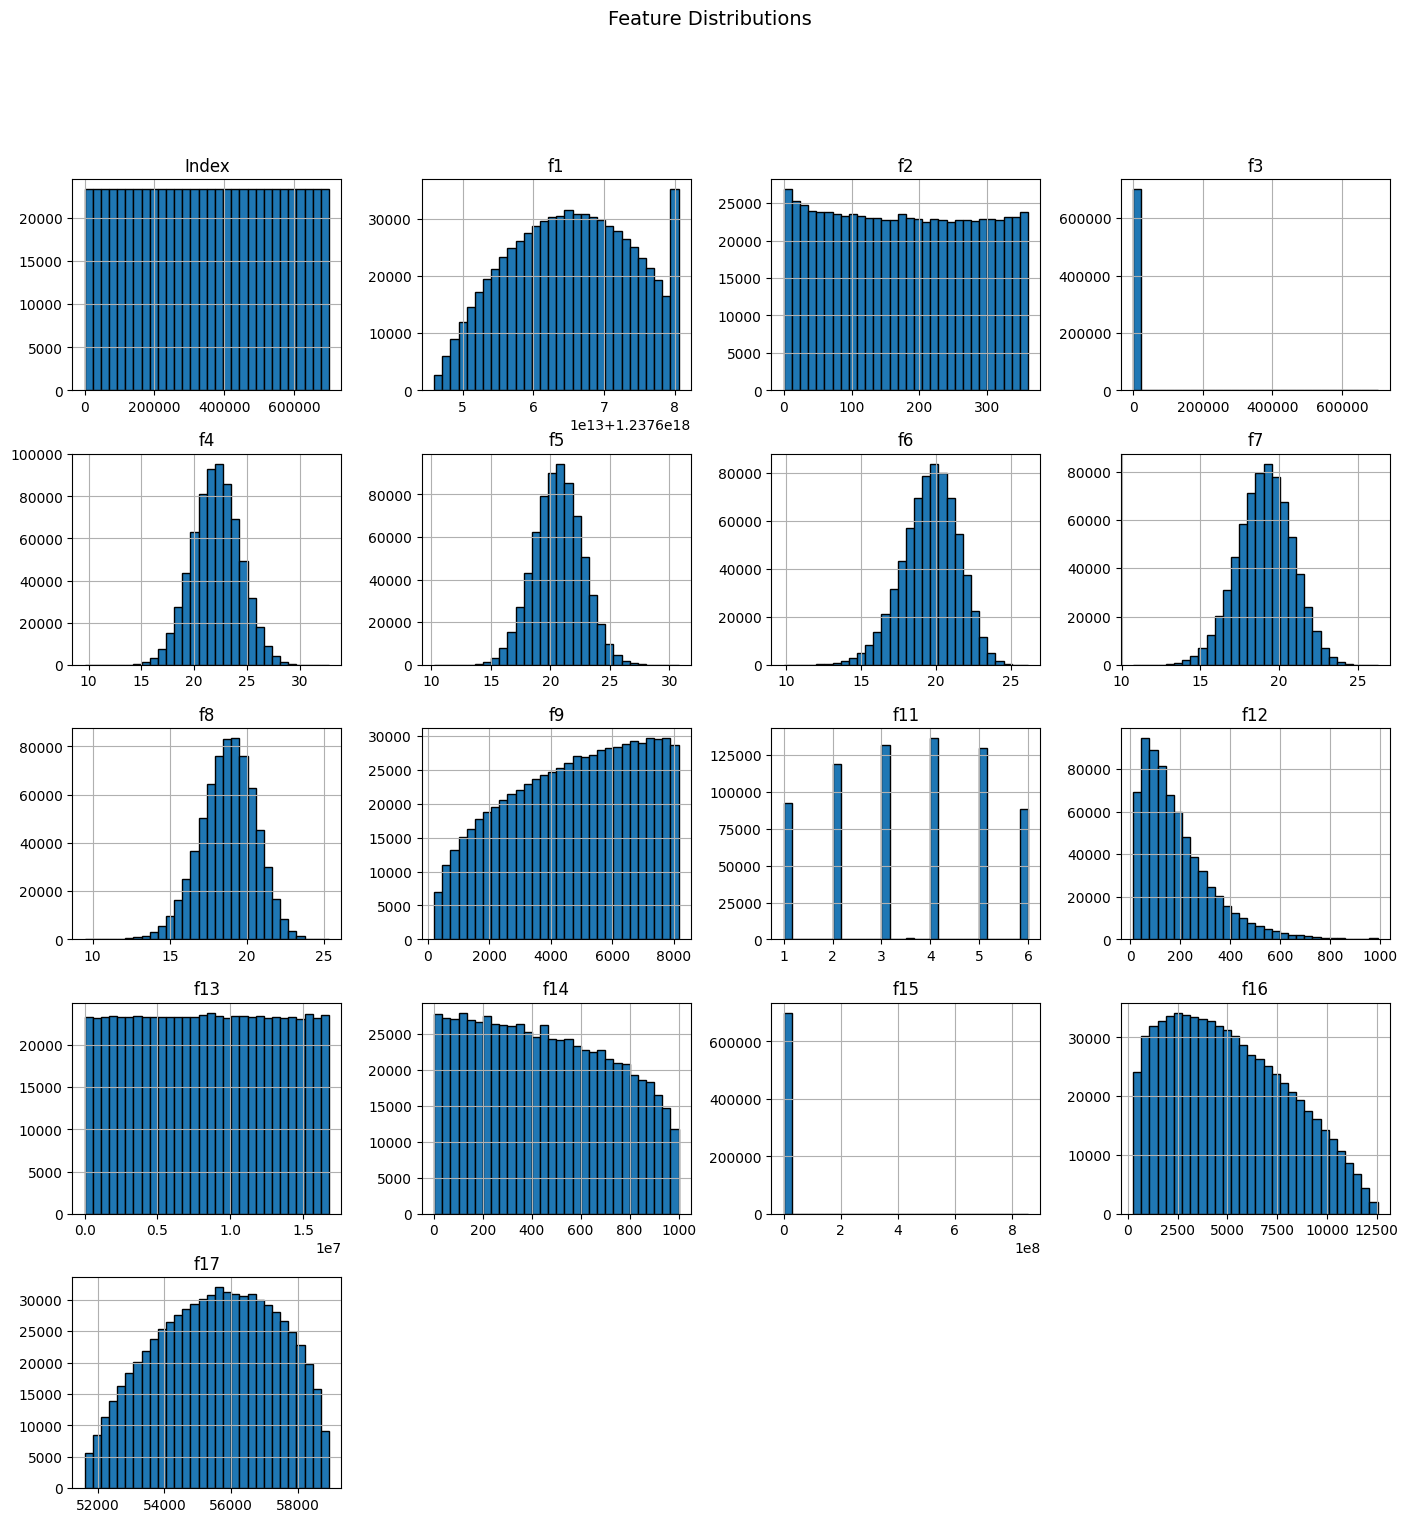

In [ ]:
numeric_df_cleaned.hist(figsize=(17, 17), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()


class
TRUTH    415774
LIE      152227
SUS      131999
Name: count, dtype: int64


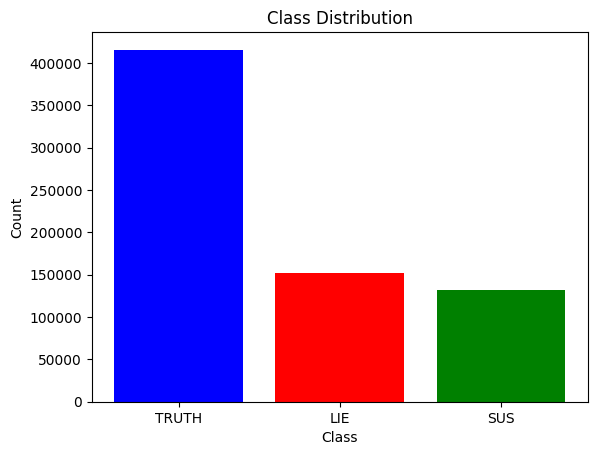

In [ ]:
import matplotlib.pyplot as plt

class_counts = df_cleaned['class'].value_counts()  # Count occurrences of each class
print(class_counts)
plt.bar(class_counts.index, class_counts.values, color=['blue', 'red', 'green'])  # Customize colors
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()



In [ ]:
df_cleaned['mean_f'] = df_cleaned.iloc[:, 1:17].mean(axis=1)   # Mean of all features
df_cleaned['std_f'] = df_cleaned.iloc[:, 1:17].std(axis=1)     # Standard deviation
df_cleaned['min_f'] = df_cleaned.iloc[:, 1:17].min(axis=1)     # Minimum value
df_cleaned['max_f'] = df_cleaned.iloc[:, 1:17].max(axis=1)     # Maximum value      # Range (max - min)
# Median


KeyError: 'min_f'

In [ ]:
df_cleaned['sum_f'] = df_cleaned.iloc[:, 1:17].sum(axis=1)     # Sum of all features
df_cleaned['median_f'] = df_cleaned.iloc[:, 1:17].median(axis=1) 

In [ ]:
df_cleaned.head()

,Index,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f15,f16,f17,class,mean_f,std_f,min_f,max_f,sum_f,median_f
0,1,1.237661e+18,301.449751,27.040725,24.76958,23.08790,21.48066,20.474219,19.719647,3609.0,...,1.270073,8352.0,57260.0,LIE,7.735380e+16,3.094152e+17,1.270073,1.237661e+18,1.237661e+18,76.520362
1,2,1.237671e+18,205.550519,31.048343,20.41429,21.19891,20.48733,19.758671,19.886145,NaN,...,1.534495,7358.0,56763.0,TRUTH,8.251141e+16,3.195653e+17,1.534495,1.237671e+18,1.237671e+18,29.000000
2,3,1.237660e+18,83.241183,12.686925,22.31979,22.99032,22.39039,21.904915,21.525323,3225.0,...,2.543397,8466.0,57402.0,TRUTH,7.735376e+16,3.094150e+17,2.543397,1.237660e+18,1.237660e+18,40.995160
3,4,1.237673e+18,336.659588,41.127456,21.39765,21.73593,19.98799,19.397739,18.933250,7080.0,...,1.362717,3696.0,54938.0,TRUTH,7.735455e+16,3.094182e+17,1.362717,1.237673e+18,1.237673e+18,164.563728
4,5,1.237662e+18,15.801014,10.116555,22.90189,21.51508,19.44966,17.908611,17.377112,4394.0,...,0.265045,2500.0,54864.0,TRUTH,7.735389e+16,3.094156e+17,0.265045,1.237662e+18,1.237662e+18,22.208485


In [ ]:
numeric_df_cleaned = df_cleaned.select_dtypes(include=['number'])
numeric_df_cleaned.head()

,Index,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f14,f15,f16,f17,mean_f,std_f,min_f,max_f,sum_f,median_f
0,1,1.237661e+18,301.449751,27.040725,24.76958,23.08790,21.48066,20.474219,19.719647,3609.0,...,453.0,1.270073,8352.0,57260.0,7.735380e+16,3.094152e+17,1.270073,1.237661e+18,1.237661e+18,76.520362
1,2,1.237671e+18,205.550519,31.048343,20.41429,21.19891,20.48733,19.758671,19.886145,NaN,...,29.0,1.534495,7358.0,56763.0,8.251141e+16,3.195653e+17,1.534495,1.237671e+18,1.237671e+18,29.000000
2,3,1.237660e+18,83.241183,12.686925,22.31979,22.99032,22.39039,21.904915,21.525323,3225.0,...,59.0,2.543397,8466.0,57402.0,7.735376e+16,3.094150e+17,2.543397,1.237660e+18,1.237660e+18,40.995160
3,4,1.237673e+18,336.659588,41.127456,21.39765,21.73593,19.98799,19.397739,18.933250,7080.0,...,853.0,1.362717,3696.0,54938.0,7.735455e+16,3.094182e+17,1.362717,1.237673e+18,1.237673e+18,164.563728
4,5,1.237662e+18,15.801014,10.116555,22.90189,21.51508,19.44966,17.908611,17.377112,4394.0,...,142.0,0.265045,2500.0,54864.0,7.735389e+16,3.094156e+17,0.265045,1.237662e+18,1.237662e+18,22.208485


In [ ]:
correlation_matrix = numeric_df_cleaned.corr()
correlation_matrix

,Index,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f14,f15,f16,f17,mean_f,std_f,min_f,max_f,sum_f,median_f
Index,1.000000,-0.000289,0.000656,0.001153,0.001032,0.001794,0.001302,0.001320,0.001425,-0.000422,...,0.001317,0.001309,0.002578,0.002058,-0.000917,-0.001000,0.000253,-0.001067,-0.001067,0.000226
f1,-0.000289,1.000000,0.003265,-0.004734,0.133878,0.155921,0.159060,0.151984,0.142893,0.977366,...,0.061146,-0.001193,0.261238,0.262549,0.000931,0.001788,0.075271,1.000000,1.000000,-0.006801
f2,0.000656,0.003265,1.000000,0.000932,0.000704,-0.009373,-0.016235,-0.016397,-0.018335,0.033451,...,0.025557,0.001268,0.009461,0.020380,-0.000551,-0.000649,0.008519,-0.000737,-0.000737,0.486624
f3,0.001153,-0.004734,0.000932,1.000000,-0.000919,-0.000160,0.000462,0.000751,0.000852,-0.004774,...,0.002587,0.000026,0.001660,0.002114,-0.000028,-0.000004,0.003596,0.000020,0.000020,0.005159
f4,0.001032,0.133878,0.000704,-0.000919,1.000000,0.852420,0.713559,0.609711,0.524702,0.143295,...,0.167551,-0.000300,0.397923,0.407465,-0.001441,-0.001534,0.269031,-0.001604,-0.001604,0.045376
f5,0.001794,0.155921,-0.009373,-0.000160,0.852420,1.000000,0.923185,0.840900,0.756045,0.164941,...,0.201685,-0.000479,0.569352,0.580465,-0.000850,-0.000855,0.392151,-0.000847,-0.000847,0.045875
f6,0.001302,0.159060,-0.016235,0.000462,0.713559,0.923185,1.000000,0.956376,0.904316,0.165466,...,0.201091,-0.001283,0.628772,0.644106,0.000075,0.000077,0.410689,0.000079,0.000079,0.039179
f7,0.001320,0.151984,-0.016397,0.000751,0.609711,0.840900,0.956376,1.000000,0.964846,0.156668,...,0.195388,-0.001783,0.634650,0.645906,0.000337,0.000324,0.429492,0.000307,0.000307,0.036893
f8,0.001425,0.142893,-0.018335,0.000852,0.524702,0.756045,0.904316,0.964846,1.000000,0.145607,...,0.182751,-0.002114,0.612633,0.624837,0.000823,0.000851,0.408480,0.000866,0.000866,0.031921
f9,-0.000422,0.977366,0.033451,-0.004774,0.143295,0.164941,0.165466,0.156668,0.145607,1.000000,...,0.068338,-0.001128,0.258944,0.264288,0.000098,0.000042,0.076734,-0.000014,-0.000014,0.006618


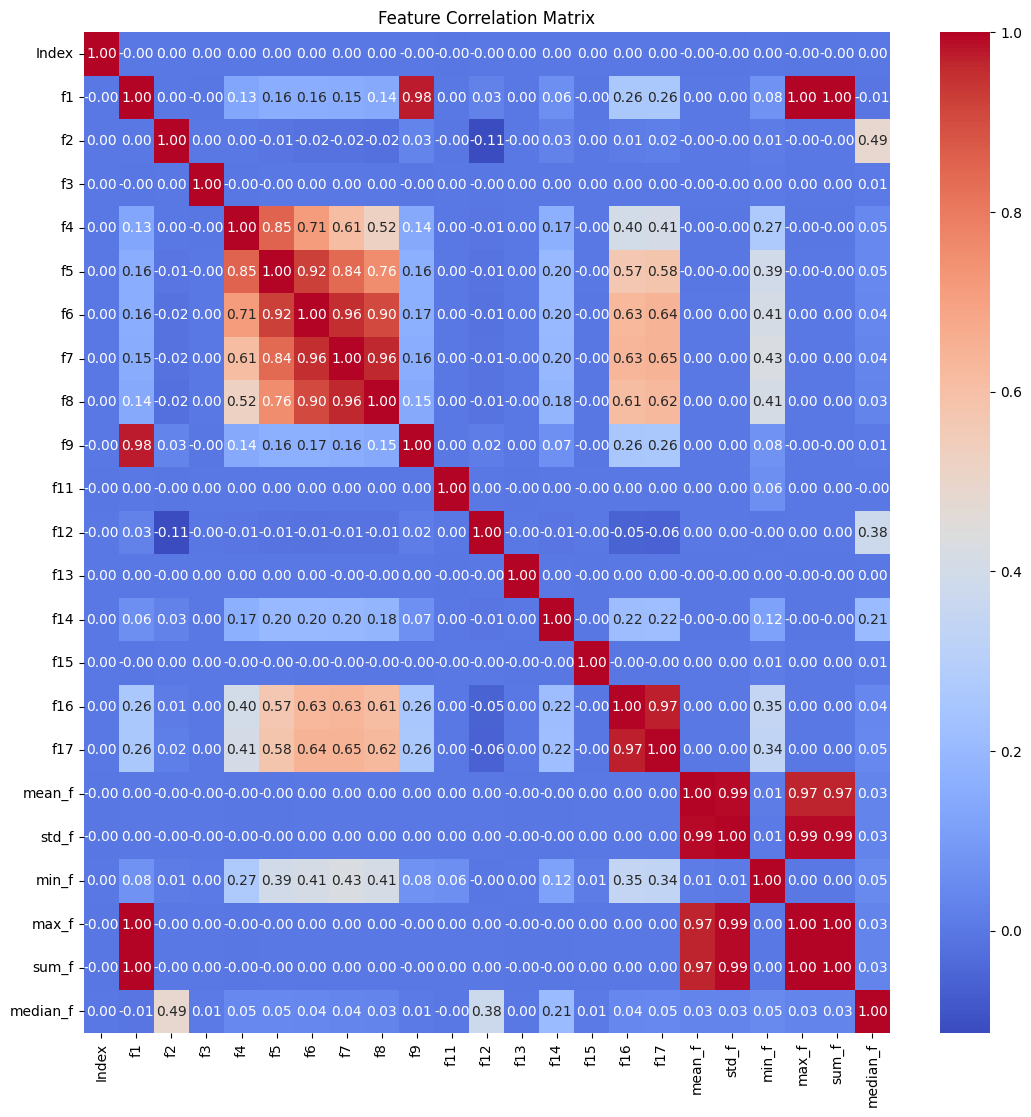

In [ ]:

plt.figure(figsize=(13, 13))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True,fmt = ".2f" )
plt.title("Feature Correlation Matrix")
plt.show()


Lower traingled heatmap - to avoid redundancy

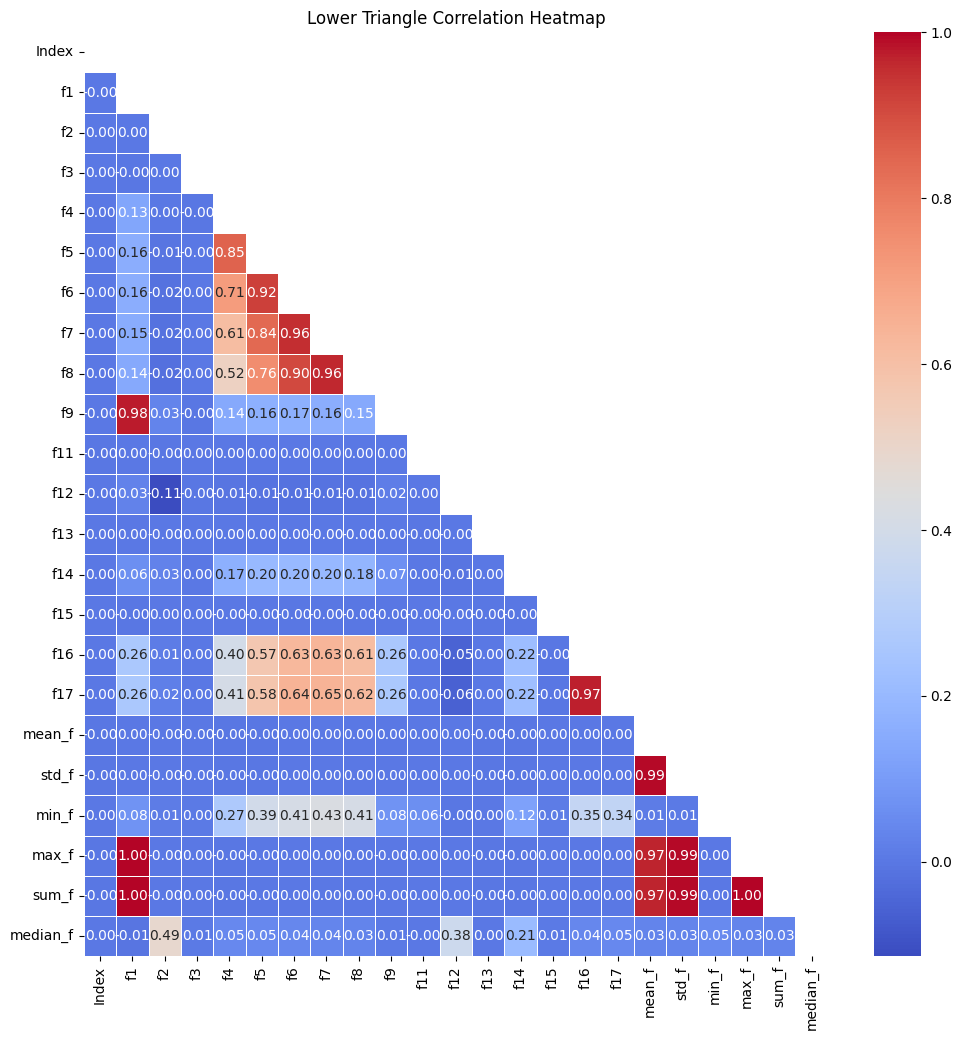

In [ ]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle

plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Lower Triangle Correlation Heatmap")
plt.show()

In [ ]:
vif_data = pd.DataFrame()

In [ ]:
vif_data["Feature"] = numeric_df_cleaned.columns[1:]  # Excluding 'id' and 'class'


,Feature
0,f1
1,f2
2,f3
3,f4
4,f5
5,f6
6,f7
7,f8
8,f9
9,f11


In [ ]:
numeric_df_cleaned.fillna(numeric_df_cleaned.mean(), inplace=True)


In [ ]:
vif_data["VIF"] = [variance_inflation_factor(numeric_df_cleaned.iloc[:, 1:].values, i) for i in range(numeric_df_cleaned.iloc[:, 1:].shape[1])]


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
print(vif_data.sort_values(by="VIF", ascending=False))

     Feature           VIF
20     sum_f           inf
19     max_f           inf
17     std_f  5.830935e+06
16    mean_f  1.510282e+06
11       f13  2.461799e+02
13       f15  1.250092e+01
15       f17  1.026910e+01
6         f7  1.668425e+00
5         f6  1.656740e+00
7         f8  1.594192e+00
14       f16  1.503860e+00
4         f5  1.485418e+00
3         f4  1.195132e+00
18     min_f  1.134046e+00
8         f9  1.073548e+00
12       f14  1.049487e+00
21  median_f  1.003875e+00
10       f12  1.002646e+00
1         f2  1.000280e+00
2         f3  1.000011e+00
9        f11  1.000007e+00
0         f1  9.030389e-08


In [ ]:
print(df_cleaned.columns)


Index(['Index', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f11',
       'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'class', 'mean_f', 'std_f',
       'min_f', 'max_f', 'sum_f', 'median_f'],
      dtype='object')


In [ ]:
numeric_df_cleaned.columns

Index(['Index', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f11',
       'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'mean_f', 'std_f', 'min_f',
       'max_f', 'sum_f', 'median_f'],
      dtype='object')

In [ ]:
df_cleaned['class'] = df['class']

In [ ]:
df_cleaned.columns

Index(['Index', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f11',
       'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'class', 'mean_f', 'std_f',
       'min_f', 'max_f', 'sum_f', 'median_f'],
      dtype='object')

In [ ]:
X = df_cleaned.drop(columns=['Index', 'class'])  # Drop non-informative columns
y = df_cleaned['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Random Forest Classifier

In [ ]:

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Predictions
y_pred = rf.predict(X_test)


ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values